<a href="https://colab.research.google.com/github/FlorianHuchede/UZStats/blob/master/CME_Tick_Changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An application to FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Jul-2019

## Import packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from scipy import stats

In [0]:
pd.set_option('display.max_rows', 200)

## File paths

# The Robert and Rosenbaum Uncertainty Zones model

In [0]:
URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [0]:
URL_EUR_1 = 'EUR/prior/'

In [0]:
PATH_EUR_PRIOR = URL_ROOT+URL_EUR_1

In [0]:
EUR_PRIOR_CDATES =pd.DataFrame(
 [['6EU5', '20150615'],
 ['6EU5', '20150616'],
 ['6EU5', '20150617'],
 ['6EU5', '20150618'],
 ['6EU5', '20150619'],
 ['6EU5', '20150622'],
 ['6EU5', '20150623'],
 ['6EU5', '20150624'],
 ['6EU5', '20150625'],
 ['6EU5', '20150626'],
 ['6EU5', '20150629'],
 ['6EU5', '20150630'],
 ['6EU5', '20150701'],
 ['6EU5', '20150702'],
 ['6EU5', '20150703'],
 ['6EU5', '20150706'],
 ['6EU5', '20150707'],
 ['6EU5', '20150708'],
 ['6EU5', '20150709'],
 ['6EU5', '20150710'],
 ['6EU5', '20150713'],
 ['6EU5', '20150714'],
 ['6EU5', '20150715'],
 ['6EU5', '20150716'],
 ['6EU5', '20150717'],
 ['6EU5', '20150720'],
 ['6EU5', '20150721'],
 ['6EU5', '20150722'],
 ['6EU5', '20150723'],
 ['6EU5', '20150724'],
 ['6EU5', '20150727'],
 ['6EU5', '20150728'],
 ['6EU5', '20150729'],
 ['6EU5', '20150730'],
 ['6EU5', '20150731'],
 ['6EU5', '20150803'],
 ['6EU5', '20150804'],
 ['6EU5', '20150805'],
 ['6EU5', '20150806'],
 ['6EU5', '20150807'],
 ['6EU5', '20150810'],
 ['6EU5', '20150811'],
 ['6EU5', '20150812'],
 ['6EU5', '20150813'],
 ['6EU5', '20150814'],
 ['6EU5', '20150817'],
 ['6EU5', '20150818'],
 ['6EU5', '20150819'],
 ['6EU5', '20150820'],
 ['6EU5', '20150821'],
 ['6EU5', '20150824'],
 ['6EU5', '20150825'],
 ['6EU5', '20150826'],
 ['6EU5', '20150827'],
 ['6EU5', '20150828'],
 ['6EU5', '20150831'],
 ['6EU5', '20150901'],
 ['6EU5', '20150902'],
 ['6EU5', '20150903'],
 ['6EU5', '20150904'],
 ['6EU5', '20150907'],
 ['6EU5', '20150908'],
 ['6EU5', '20150909'],
 ['6EU5', '20150910'],
 ['6EU5', '20150911'],
 ['6EZ5', '20150914'],
 ['6EZ5', '20150915'],
 ['6EZ5', '20150916'],
 ['6EZ5', '20150917'],
 ['6EZ5', '20150918'],
 ['6EZ5', '20150921'],
 ['6EZ5', '20150922'],
 ['6EZ5', '20150923'],
 ['6EZ5', '20150924'],
 ['6EZ5', '20150925'],
 ['6EZ5', '20150928'],
 ['6EZ5', '20150929'],
 ['6EZ5', '20150930'],
 ['6EZ5', '20151001'],
 ['6EZ5', '20151002'],
 ['6EZ5', '20151005'],
 ['6EZ5', '20151006'],
 ['6EZ5', '20151007'],
 ['6EZ5', '20151008'],
 ['6EZ5', '20151009'],
 ['6EZ5', '20151012'],
 ['6EZ5', '20151013'],
 ['6EZ5', '20151014'],
 ['6EZ5', '20151015'],
 ['6EZ5', '20151016'],
 ['6EZ5', '20151019'],
 ['6EZ5', '20151020'],
 ['6EZ5', '20151021'],
 ['6EZ5', '20151022'],
 ['6EZ5', '20151023'],
 ['6EZ5', '20151026'],
 ['6EZ5', '20151027'],
 ['6EZ5', '20151028'],
 ['6EZ5', '20151029'],
 ['6EZ5', '20151030'],
 ['6EZ5', '20151102'],
 ['6EZ5', '20151103'],
 ['6EZ5', '20151104'],
 ['6EZ5', '20151105'],
 ['6EZ5', '20151106'],
 ['6EZ5', '20151109'],
 ['6EZ5', '20151110'],
 ['6EZ5', '20151111'],
 ['6EZ5', '20151112'],
 ['6EZ5', '20151113'],
 ['6EZ5', '20151116'],
 ['6EZ5', '20151117'],
 ['6EZ5', '20151118'],
 ['6EZ5', '20151119'],
 ['6EZ5', '20151120'],
 ['6EZ5', '20151123'],
 ['6EZ5', '20151124'],
 ['6EZ5', '20151125'],
 ['6EZ5', '20151126'],
 ['6EZ5', '20151127'],
 ['6EZ5', '20151130'],
 ['6EZ5', '20151201'],
 ['6EZ5', '20151202'],
 ['6EZ5', '20151203'],
 ['6EZ5', '20151204'],
 ['6EZ5', '20151207'],
 ['6EZ5', '20151208'],
 ['6EZ5', '20151209'],
 ['6EZ5', '20151210'],
 ['6EZ5', '20151211'],
 ['x6EH6', '20151214'],
 ['x6EH6', '20151215'],
 ['x6EH6', '20151216'],
 ['x6EH6', '20151217'],
 ['x6EH6', '20151218'],
 ['x6EH6', '20151221'],
 ['x6EH6', '20151222'],
 ['x6EH6', '20151223'],
 ['x6EH6', '20160104'],
 ['x6EH6', '20160105'],
 ['x6EH6', '20160106'],
 ['x6EH6', '20160107'],
 ['x6EH6', '20160108']],
    columns=['Contract','Date'])

In [0]:
EUR_PRIOR_CDATES['Status'] = 'prior'
EUR_PRIOR_CDATES['Tick'] = 1.0

In [0]:
#EUR_PRIOR_CDATES

In [0]:
FILES_EUR_PRIOR_CAticks = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_CAticks.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_COSTtrades = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_COSTtrades.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_OBstats = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_OBstats.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_OTtrans = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_OTtrans.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_RDFtrans = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_RDFtrans.csv' for j in range(len(EUR_PRIOR_CDATES))]
FILES_EUR_PRIOR_UZstats = [PATH_EUR_PRIOR+EUR_PRIOR_CDATES['Contract'].iloc[j]+\
                           '_'+EUR_PRIOR_CDATES['Date'].iloc[j]+\
                          '_UZstats.csv' for j in range(len(EUR_PRIOR_CDATES))]

In [10]:
pd.read_csv(FILES_EUR_PRIOR_CAticks[0], index_col=0)

Li      lamb      Co      Al         u       eta
0  1.0  0.986315  1571.0  2536.0  0.309740  0.305501
1  2.0  0.013445     9.0    47.0 -0.308511 -0.004148
2  3.0  0.000240     1.0     0.0       inf       inf

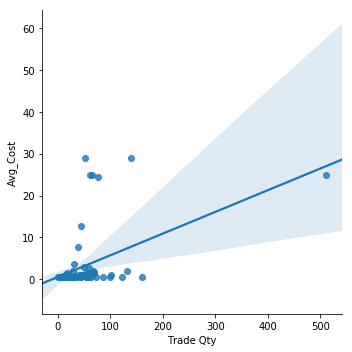

In [11]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=pd.read_csv(FILES_EUR_PRIOR_COSTtrades[0], index_col=0));

In [12]:
pd.read_csv(FILES_EUR_PRIOR_OBstats[0], index_col=0)

ask12qty  ask12tomid    ask1qty  ...  bid1tomid    twspr1    twspr2
6EU5_20150615  84.895356    1.302916  21.446649  ...   0.540151  1.080303  3.080303

[1 rows x 10 columns]

In [13]:
pd.read_csv(FILES_EUR_PRIOR_OTtrans[0], index_col=0)

-2.0    -1.0     0.0     1.0    2.0
t                                         
-2.0  10620    7757    3102     630      3
-1.0   4719  116893    7593     523   2320
 0.0   4732    6190  165549    5918   4594
 1.0   2039     550    7815  115029   4655
 2.0      2     658    2924    7988  11680

In [14]:
pd.read_csv(FILES_EUR_PRIOR_RDFtrans[0], header=[0,1], index_col=0)

side   same                   opps                 
event  DC    DT   DT+F  F     DC    DT   DT+F  F   
DC        3     5   50  4344     3     3  584   183
DT        1    25  232  3817     2     4  985  1059
DT+F      2     2   99  1449     1     4  385   396
F      2950  1739    1    16  2212  4344    2    18

In [15]:
pd.read_csv(FILES_EUR_PRIOR_UZstats[0], index_col=0)

chgavg    dt_alt    dt_avg  ...      rvxe      spot_avg      M
6EU5_20150615  1.013926  6.437141  6.914228  ...  0.004572  11265.414786  18439

[1 rows x 11 columns]

## Run stats

In [0]:
DF_STATS_EUR = pd.DataFrame()
for j in range(len(FILES_EUR_PRIOR_OBstats)):
    new_row_1 = pd.read_csv(FILES_EUR_PRIOR_OBstats[j], index_col=0)
    new_row_2 = pd.read_csv(FILES_EUR_PRIOR_UZstats[j], index_col=0)
    new_row = pd.concat([new_row_1, new_row_2], axis=1, sort=False)
    DF_STATS_EUR = DF_STATS_EUR.append(new_row)
DF_STATS_EUR.reset_index(inplace=True, drop=True)
DF_STATS_EUR['Contract'] = EUR_PRIOR_CDATES['Contract']
DF_STATS_EUR['Dates'] = pd.to_datetime(EUR_PRIOR_CDATES['Date'], format='%Y%m%d')
DF_STATS_EUR['Tick'] = EUR_PRIOR_CDATES['Tick']
DF_STATS_EUR['Status'] = EUR_PRIOR_CDATES['Status']
DF_STATS_EUR.set_index(['Dates'], inplace=True)

## Cost Analysis

In [0]:
COST_STATS_EUR = pd.DataFrame()
for j in range(len(FILES_EUR_PRIOR_COSTtrades)):
  df = pd.read_csv(FILES_EUR_PRIOR_COSTtrades[j], index_col=0)
  new_df = df.loc[df.index.repeat(df['Avg_Cost'])].assign(Dates=pd.to_datetime(EUR_PRIOR_CDATES['Date'].iloc[j], format='%Y%m%d')).reset_index(drop=True)
  #new_df.head()
  COST_STATS_EUR = COST_STATS_EUR.append(new_df)


Text(0, 0.5, 'Distribution of Average Cost')

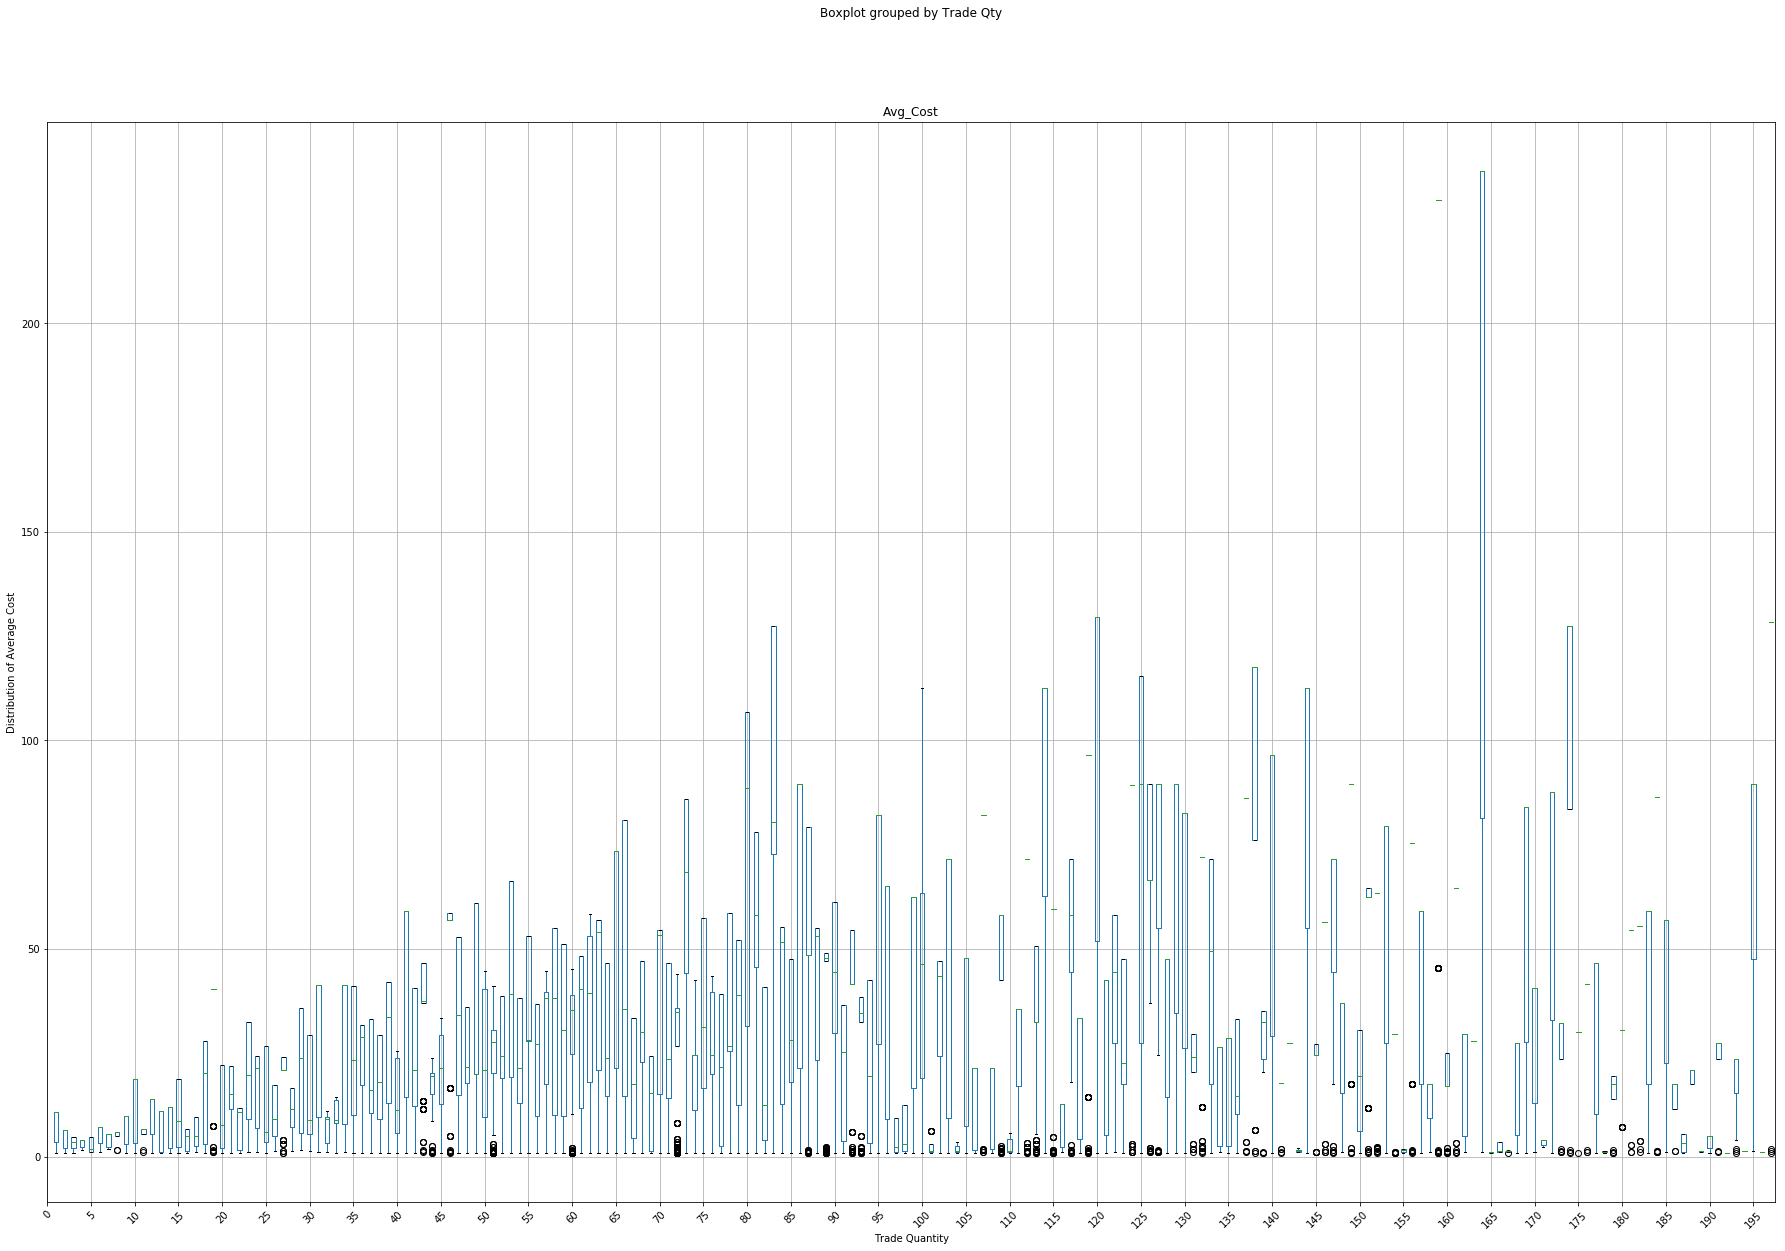

In [18]:
idx_cost = COST_STATS_EUR['Trade Qty']<200
boxplot = COST_STATS_EUR[idx_cost].boxplot(by='Trade Qty', grid=True,  figsize=(30,20), )
pct_labels = np.arange(0, 200, 5)
boxplot.set_xticks(pct_labels)
boxplot.set_xticklabels(pct_labels, rotation=45)
boxplot.set_xlabel("Trade Quantity")
boxplot.set_ylabel("Distribution of Average Cost")


In [19]:
DF_STATS_EUR.head()

ask12qty  ask12tomid    ask1qty  ...  Contract  Tick  Status
Dates                                          ...                        
2015-06-15   84.895356    1.302916  21.446649  ...      6EU5   1.0   prior
2015-06-16  104.524580    1.433306  26.959599  ...      6EU5   1.0   prior
2015-06-17   91.924172    1.436725  23.499954  ...      6EU5   1.0   prior
2015-06-18   82.989397    1.350425  20.797045  ...      6EU5   1.0   prior
2015-06-19  111.054435    1.306565  26.601901  ...      6EU5   1.0   prior

[5 rows x 24 columns]

In [0]:
DF_STATS_EUR_NI = DF_STATS_EUR.reset_index()

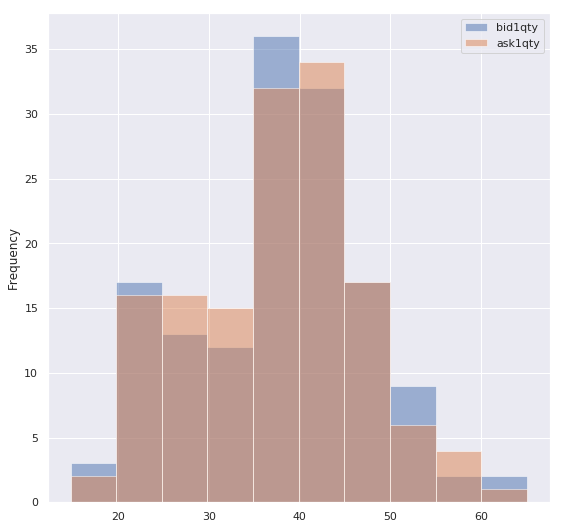

In [21]:
 sns.set(style="darkgrid")
DF_STATS_EUR[['bid1qty','ask1qty']].plot(figsize=(9,9), grid= True, kind = 'hist', alpha=0.5);

## **Eta Analysis**

### Regression analysis

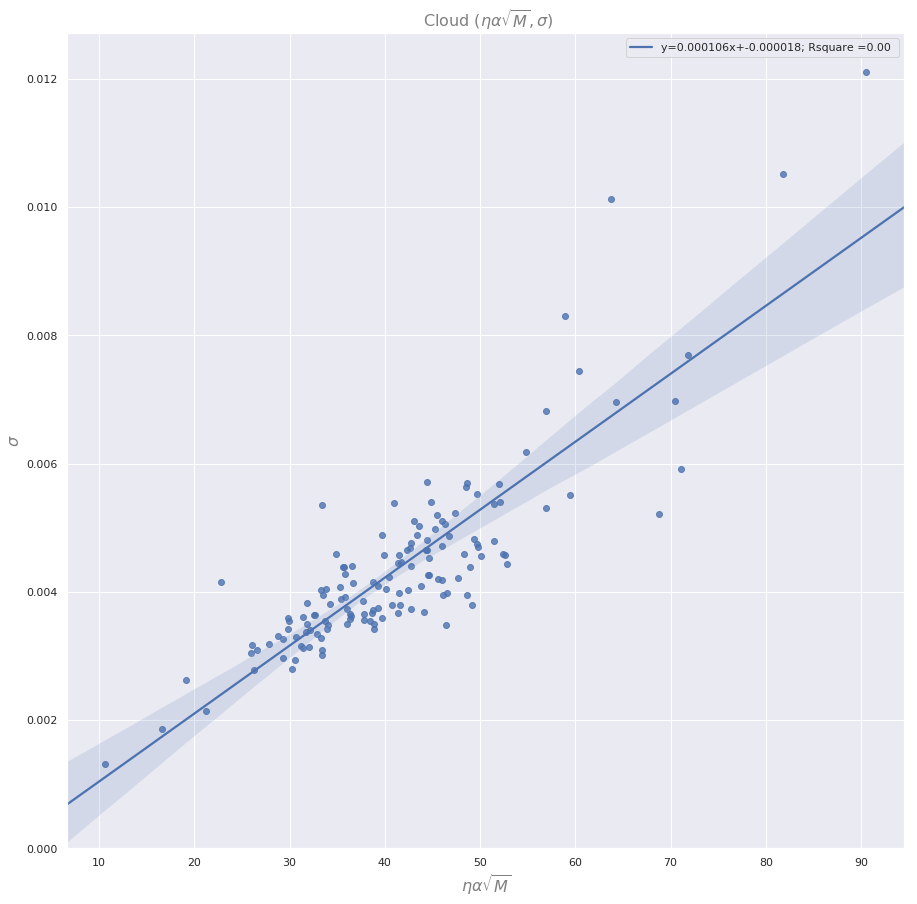

0.8639038193827252


In [22]:
#### NEED TO FIX RSQUARE RENDERING
#### Why in UZ paper fig 3 the vol is around 1000 ?  not the case for RVXE variable

DF_STATS_EUR['IndVariable1'] = DF_STATS_EUR['Tick']* DF_STATS_EUR['eta1']*np.sqrt(DF_STATS_EUR['M'])
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_STATS_EUR['IndVariable1'],DF_STATS_EUR['rvxe'])

sns.set(style="darkgrid")
plt.figure(1, figsize=(15, 15))
# DF_STATS_EUR.plot(figsize=(9,9), y = 'rvxe', x = 'IndVariable1', grid= True, kind = 'scatter', ylim = [0,0.01]);
ax = sns.regplot(x="IndVariable1", y="rvxe", data=DF_STATS_EUR, 
 line_kws={'label':"y={0:.6f}x+{1:.6f}; Rsquare ={0:.2f} ".format(slope,intercept, r_value*100)})
plt.title(r" Cloud ("
          r"$\eta\alpha\sqrt{M}, \sigma)$",
          fontsize=16, color='gray')
plt.xlabel(r"$\eta\alpha\sqrt{M}$",
          fontsize=16, color='gray')
plt.ylabel(r"$\sigma$",
          fontsize=16, color='gray')

ax.legend()

plt.ylim(0, )
plt.show()

print(r_value)

In [23]:
DF_STATS_EUR['IndVariable2'] =  DF_STATS_EUR['spot_avg']*np.sqrt(DF_STATS_EUR['M'])
#slope, intercept, r_value, p_value, std_err = stats.linregress(DF_STATS_EUR[['IndVariable1','IndVariable2'],DF_STATS_EUR['rvxe']])

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(DF_STATS_EUR[['IndVariable1','IndVariable2']],DF_STATS_EUR['rvxe'])
#reg.coef_
rsquare = reg.score(DF_STATS_EUR[['IndVariable1','IndVariable2']],DF_STATS_EUR['rvxe'] )
Cloud = pd.DataFrame()
Cloud['Y'] =  DF_STATS_EUR['rvxe'] - reg.coef_[1] + DF_STATS_EUR['spot_avg'] *np.sqrt(DF_STATS_EUR['M'])
Cloud['X'] = reg.coef_[0]* DF_STATS_EUR['Tick']* DF_STATS_EUR['eta1']*np.sqrt(DF_STATS_EUR['M'])
reg.coef_

array([ 1.08416339e-04, -8.16202190e-11])

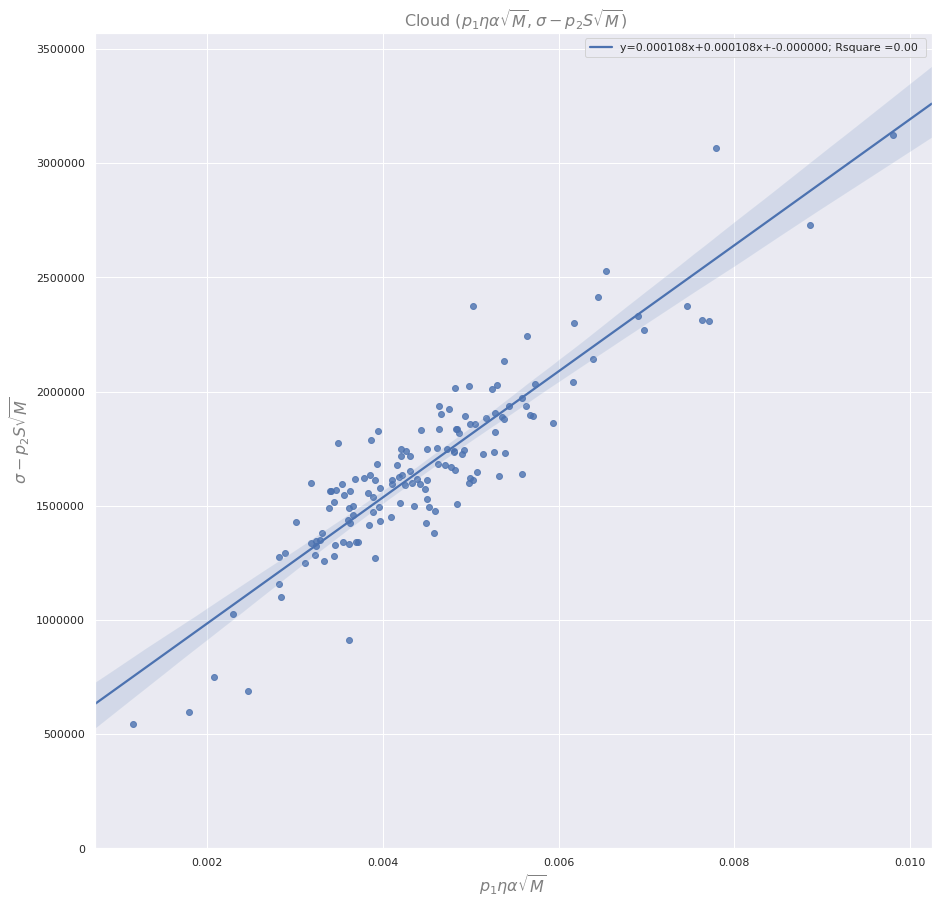

In [24]:
sns.set(style="darkgrid")
plt.figure(1, figsize=(15, 15))
# DF_STATS_EUR.plot(figsize=(9,9), y = 'rvxe', x = 'IndVariable1', grid= True, kind = 'scatter', ylim = [0,0.01]);
ax = sns.regplot(x="X", y="Y", data=Cloud, 
 line_kws={'label':"y={0:.6f}x+{0:.6f}x+{1:.6f}; Rsquare ={0:.2f} ".format(reg.coef_[0], reg.coef_[1],intercept, rsquare)})
plt.title(r" Cloud ("
          r"$p_1\eta\alpha\sqrt{M}, \sigma - p_2S\sqrt{M})$",
          fontsize=16, color='gray')
plt.xlabel(r"$p_1\eta\alpha\sqrt{M}$",
          fontsize=16, color='gray')
plt.ylabel(r"$\sigma - p_2S\sqrt{M}$",
          fontsize=16, color='gray')

ax.legend()

plt.ylim(0, )
plt.show()


### Eta Prediction

In [0]:
def etaPrediction(newTick, oldTick, oldEta, beta=1, linParams=0):
    result = (oldEta + linParams) * (oldTick / newTick)**(1 - beta/2) - linParams
    return result

In [0]:
eta1mean = DF_STATS_EUR['eta1'].mean()
eta1std = DF_STATS_EUR['eta1'].std()

product = 'EUR/USD (6E)'
currentTick = 1.0
etaMean = eta1mean
etaStD = eta1std

In [0]:
x = np.arange(0.05, currentTick*1.5, 0.005)
y = etaPrediction(x, currentTick, etaMean)
ySupLim = etaPrediction(x, currentTick, etaMean + etaStD)
yInfLim = etaPrediction(x, currentTick, etaMean - etaStD)

0.38499999999999984


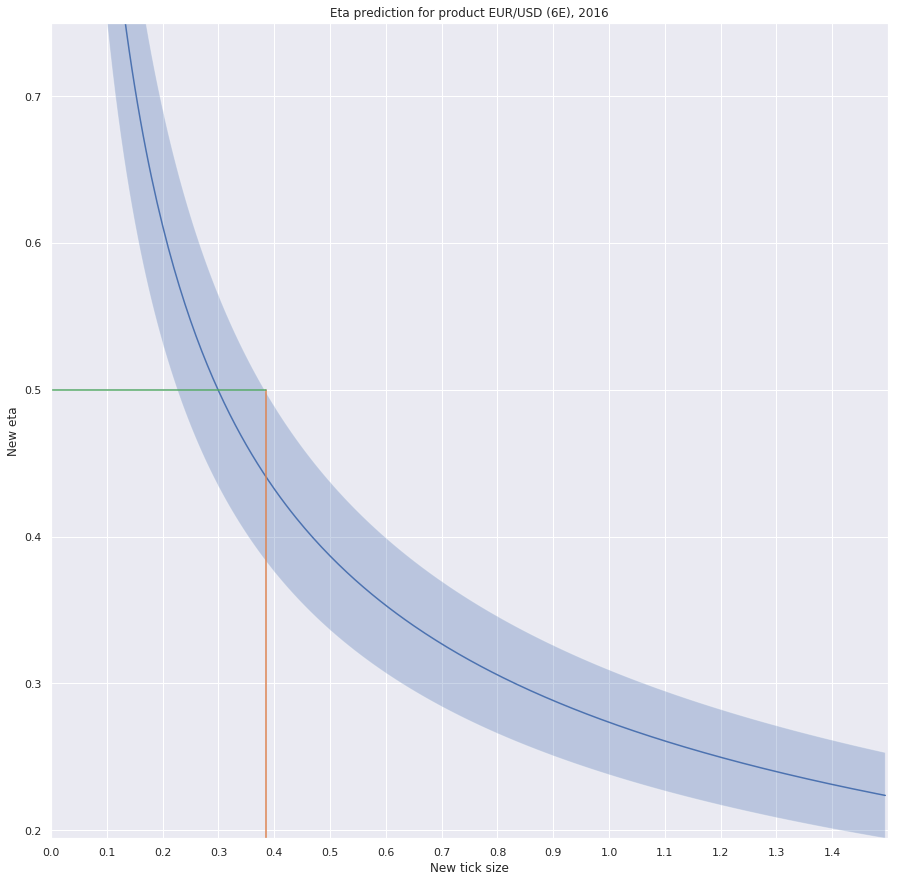

In [51]:
ttl = 'Eta prediction for product {}, 2016'
plt.figure(1, figsize=(15, 15))
plt.title(ttl.format(product))
plt.xlabel('New tick size')
plt.xlim((0.0, currentTick*1.5))
plt.ylim((min(yInfLim), .75)) #Eta of .75 is high alreday 
plt.xticks(np.arange(0.0, currentTick*1.5, 0.1))
plt.ylabel('New eta')
plt.plot(x, y)
plt.fill_between(x, yInfLim, ySupLim, alpha=0.3)

check1, check2, check3 = 0, 0, 0
for val in x:
    eval = etaPrediction(val, currentTick, etaMean)
    eval_p = etaPrediction(val, currentTick, etaMean + etaStD)
    eval_m = etaPrediction(val, currentTick, etaMean - etaStD)

    if eval_p <= 0.5 and check3 == 0:
        plt.plot([val, val], [0.0, 0.5])
        plt.plot([0.0, val], [0.5, 0.5])
        print(val)
        check3 = 1

    '''
    if eval <= 0.5 and check2 == 0:
        plt.plot([val, val], [0.17, 0.5])
        check2 = 1

    if eval_m <= 0.5 and check1 == 0:
        plt.plot([val, val], [0.17, 0.5])
        check1 = 1
    '''

## Dataframe of price changes by k

In [0]:
DF_STATS_EUR_MOVES = pd.DataFrame()
for j in range(len(FILES_EUR_PRIOR_CAticks)):
    new_row = pd.read_csv(FILES_EUR_PRIOR_CAticks[j], index_col=0)
    new_row['Dates'] = pd.to_datetime(EUR_PRIOR_CDATES['Date'].iloc[j], format='%Y%m%d')
    new_row['Tick'] = EUR_PRIOR_CDATES['Tick'].iloc[j]
    new_row['Status'] = EUR_PRIOR_CDATES['Status'].iloc[j]
    new_row['Contract'] = EUR_PRIOR_CDATES['Contract'].iloc[j]
    DF_STATS_EUR_MOVES = DF_STATS_EUR_MOVES.append(new_row)
DF_STATS_EUR_MOVES.set_index(['Dates', 'Status'], inplace=True)

In [0]:
DF_STATS_EUR_MOVES.head()

Li      lamb      Co      Al         u       eta  Tick  \
Dates      Status                                                            
2015-06-15 prior   1.0  0.986315  1571.0  2536.0  0.309740  0.305501   1.0   
           prior   2.0  0.013445     9.0    47.0 -0.308511 -0.004148   1.0   
           prior   3.0  0.000240     1.0     0.0       inf       inf   1.0   
2015-06-16 prior   1.0  0.995541   873.0  1582.0  0.275917  0.274686   1.0   
           prior   2.0  0.004054     0.0    10.0 -0.500000 -0.002027   1.0   

                  Contract  
Dates      Status           
2015-06-15 prior      6EU5  
           prior      6EU5  
           prior      6EU5  
2015-06-16 prior      6EU5  
           prior      6EU5

In [0]:
def get_moves_mat(data_frame, date):
    mat_values = data_frame.copy().loc[date].values
    mat_df = pd.DataFrame(mat_values,\
        columns=['Move in ticks', 'lambda',\
            'Continuations', 'Alternations', 'u', 'eta',\
            'Tick Value', 'Contract'])
    return mat_df

In [0]:
def get_lambda1_mat():
    sub_mat = DF_STATS_MOVES.copy().reset_index()
    sub_mat = sub_mat[sub_mat['Li']==1]\
        [['Product', 'Contract', 'Dates', 'lamb']]
    return sub_mat

In [0]:
SIZES_MOVES_EUR = pd.DataFrame([[date, len(get_moves_mat(DF_STATS_EUR_MOVES,\
    date.strftime('%Y-%m-%d'))), max(get_moves_mat(DF_STATS_EUR_MOVES,\
    date.strftime('%Y-%m-%d'))['Move in ticks'])] for date in\
      pd.to_datetime(EUR_PRIOR_CDATES['Date'], format='%Y%m%d')],\
    columns=['Dates', 'Sizes', 'Max move'])
SIZES_MOVES_EUR.set_index(['Dates'], inplace=True)

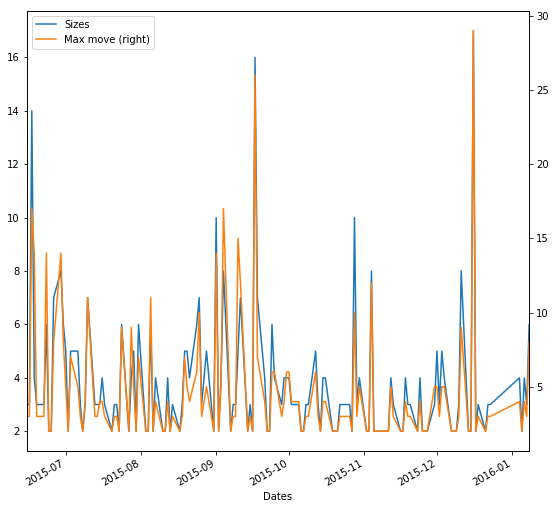

In [0]:
SIZES_MOVES_EUR.plot(secondary_y='Max move', figsize=(9,9));

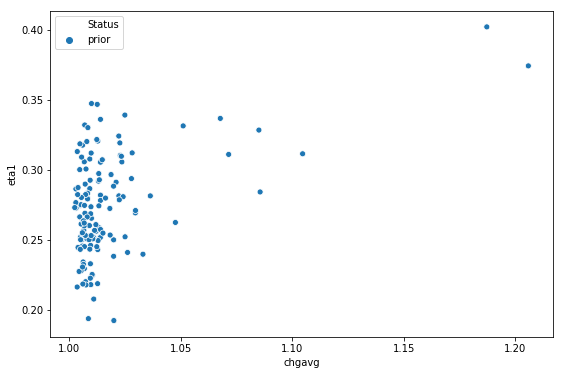

In [0]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='chgavg', y='eta1', hue='Status',\
            data=DF_STATS_EUR);

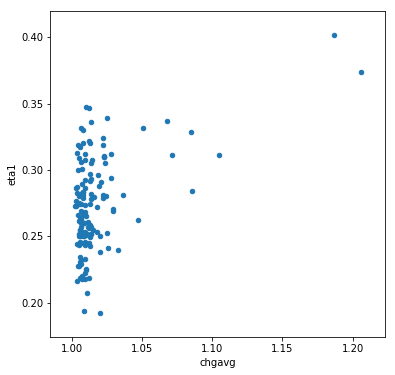

In [0]:
DF_STATS_EUR.plot.scatter(x='chgavg', y='eta1', figsize=(6,6));

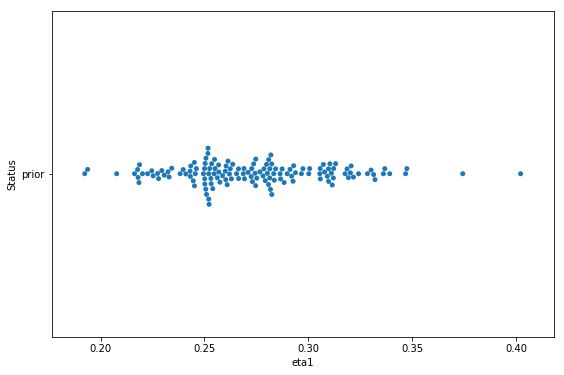

In [0]:
plt.figure(figsize=(9,6))
sns.swarmplot(x='eta1', y='Status',\
            data=DF_STATS_EUR);

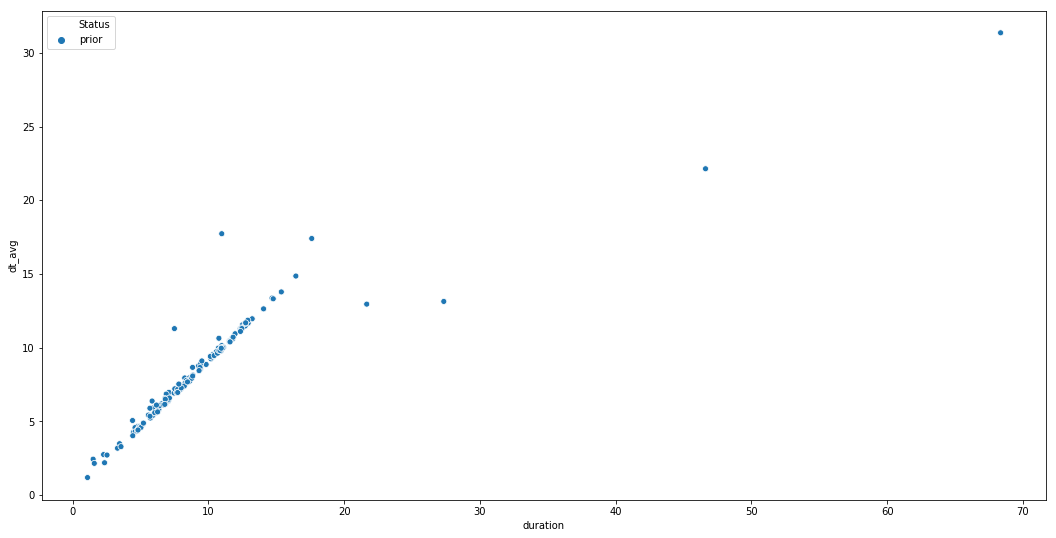

In [0]:
plt.figure(figsize=(18,9))
sns.scatterplot(x='duration', y='dt_avg', hue='Status',\
            data=DF_STATS_EUR);

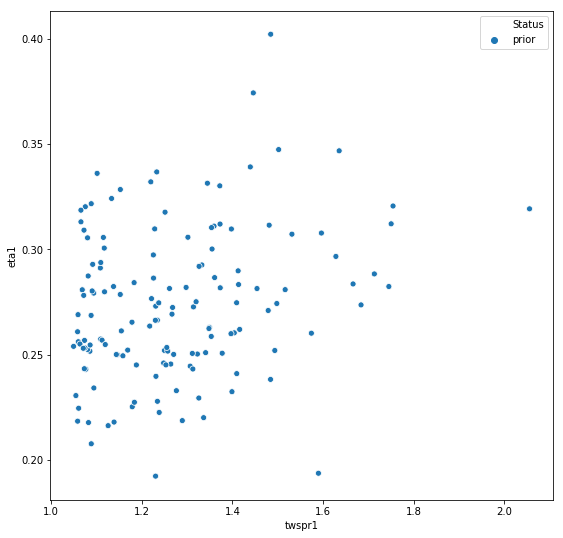

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='twspr1', y='eta1', hue='Status',\
            data=DF_STATS_EUR);

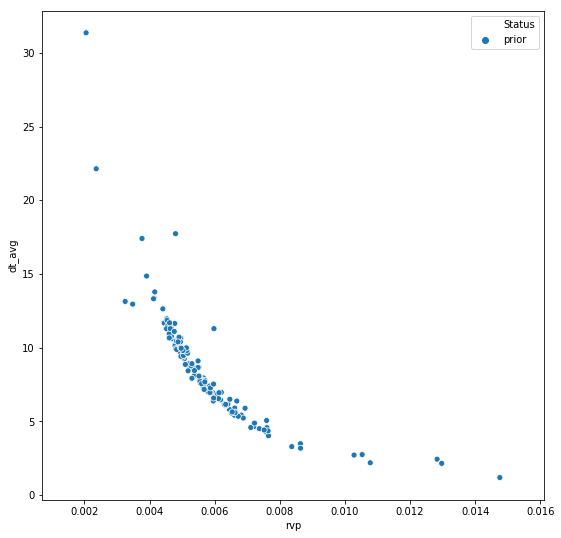

In [0]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='rvp', y='dt_avg', hue='Status',\
            data=DF_STATS_EUR);

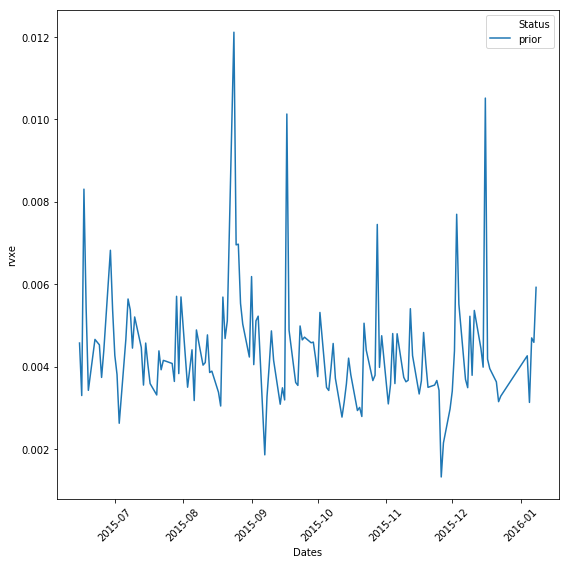

In [0]:
plt.figure(figsize=(9,9))
sns.lineplot(x='Dates', y='rvxe', hue='Status', data=DF_STATS_EUR_NI);
plt.xticks(rotation=45);

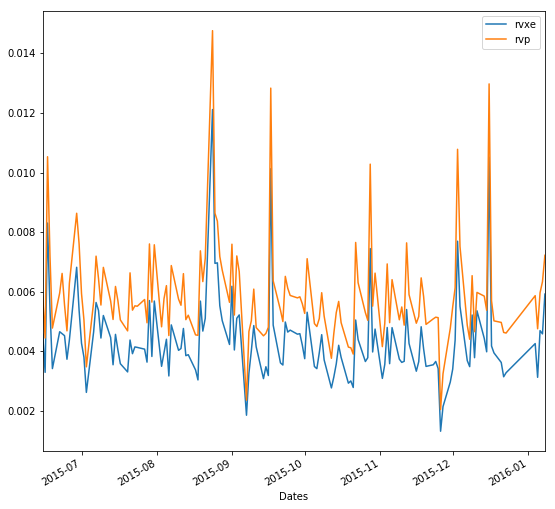

In [0]:
DF_STATS_EUR[['rvxe','rvp']].plot(figsize=(9,9));

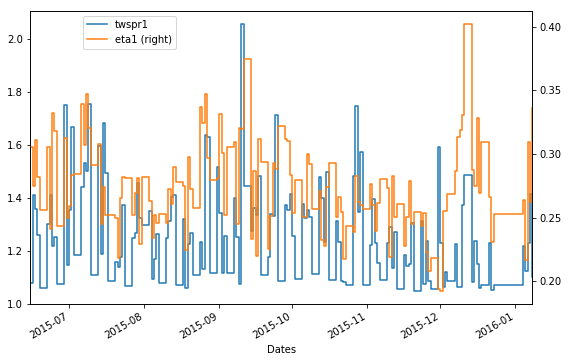

In [0]:
ax = DF_STATS_EUR[['twspr1','eta1']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['eta1']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

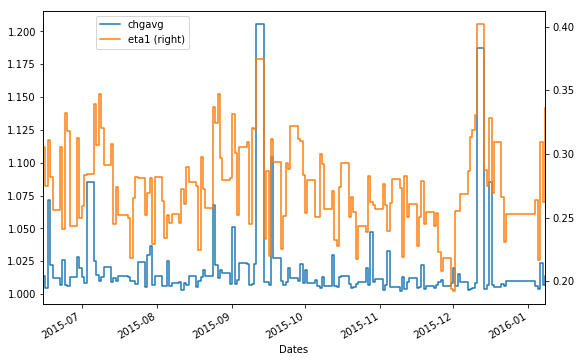

In [0]:
ax = DF_STATS_EUR[['chgavg','eta1']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['eta1']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

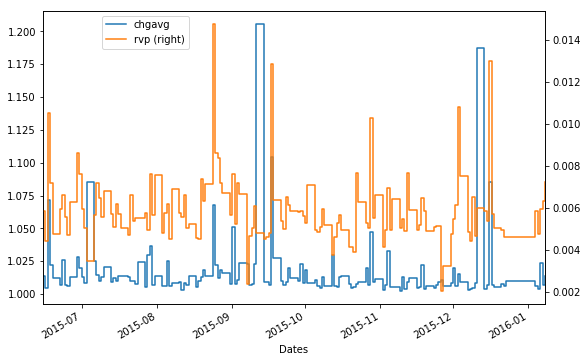

In [0]:
ax = DF_STATS_EUR[['chgavg','rvp']].plot(figsize=(9,6), drawstyle='steps-post', secondary_y=['rvp']);
ax.get_legend().set_bbox_to_anchor((0.3, 1))

In [0]:
# DF_STATS_EUR_COST = pd.DataFrame()
# for j in range(len(FILES_EUR_BEFORE_COSTtrades)):
#     new_row = pd.read_hdf(FILES_EUR_BEFORE_COSTtrades[j])
#     new_row['Date'] = DATES_BEFORE_EUR[j].strftime('%Y-%m-%d')
#     DF_STATS_EUR_COST = DF_STATS_EUR_COST.append(new_row)
# for j in range(len(FILES_EUR_AFTER_COSTtrades)):
#     new_row = pd.read_hdf(FILES_EUR_AFTER_COSTtrades[j])
#     new_row['Date'] = DATES_AFTER_EUR[j].strftime('%Y-%m-%d')
#     DF_STATS_EUR_COST = DF_STATS_EUR_COST.append(new_row)
# DF_STATS_EUR_COST.set_index('Date', inplace=True)

In [0]:
# DF_STATS_EUR_COST_NI = DF_STATS_EUR_COST.reset_index()

In [0]:
# DF_STATS_EUR_COST_2 = DF_STATS_EUR_COST.copy().loc['2015-10-01':]
# DF_STATS_EUR_COST_NI_2 = DF_STATS_EUR_COST_2.reset_index()

In [0]:
#DF_STATS_EUR_COST_2_DATES = DF_STATS_EUR_COST_2.index.unique().values

In [0]:
#sns.lmplot(x='Trade Qty', y='Avg_Cost', data=DF_STATS_EUR_COST_NI_2[DF_STATS_EUR_COST_NI_2['Date'] == DF_STATS_EUR_COST_2_DATES[0]]);

In [0]:
#sns.lmplot(x='Trade Qty', y='Avg_Cost', data=DF_STATS_EUR_COST_NI_2[DF_STATS_EUR_COST_NI_2['Date'] == DF_STATS_EUR_COST_2_DATES[1]]);

In [0]:
from pandas.plotting import scatter_matrix

In [0]:
DF_STATS_EUR.columns

Index(['ask12qty', 'ask12tomid', 'ask1qty', 'ask1tomid', 'bid12qty',
       'bid12tomid', 'bid1qty', 'bid1tomid', 'twspr1', 'twspr2', 'chgavg',
       'dt_alt', 'dt_avg', 'dt_cont', 'duration', 'eta1', 'ndfpr', 'rvp',
       'rvxe', 'spot_avg', 'Contract', 'Tick', 'Status'],
      dtype='object')

In [0]:
SUB_DF_STATS_EUR = DF_STATS_EUR[['twspr1', 'chgavg', 'dt_avg', 'eta1', 'ndfpr', 'rvp']]

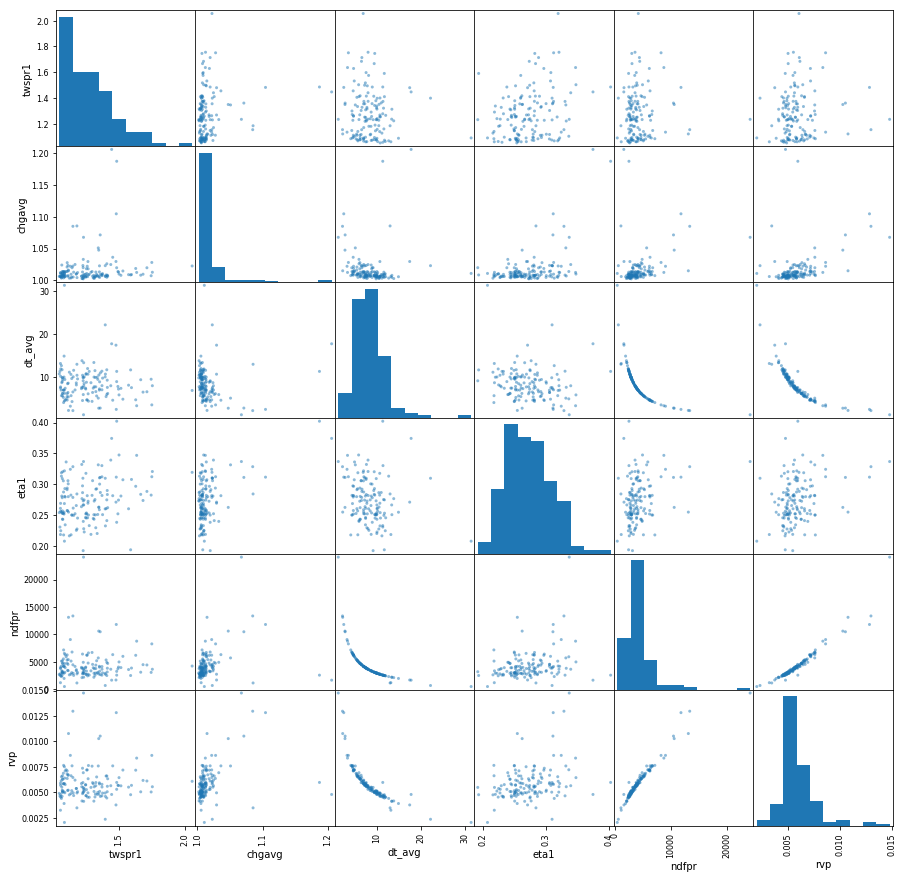

In [0]:
scatter_matrix(SUB_DF_STATS_EUR, figsize=(15, 15));